## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0   3.953978  1731.629469  0.276471  7.530588   478.946546
1  16.565382   665.165065  0.358280  5.589768   238.868998
2  62.129679  1079.351280  0.998963  3.107287  1079.959637
3  38.628257   317.953020  0.239031  8.245692    85.253795
4  18.519790   711.817395  0.635603  1.208834   452.769896


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0184287	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0077873	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9983072	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9876736	total: 59ms	remaining: 14.7s
4:	learn: 0.9753215	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9647486	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9526934	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9423135	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9329794	total: 61.7ms	remaining: 6.8s
9:	learn: 0.9208145	total: 62.2ms	remaining: 6.16s
10:	learn: 0.9124608	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8983766	total: 63.2ms	remaining: 5.2s
12:	learn: 0.8877625	total: 63.6ms	remaining: 4.83s
13:	learn: 0.8761635	total: 64ms	remaining: 4.51s
14:	learn: 0.8653915	total: 64.5ms	remaining: 4.24s
15:	learn: 0.8565474	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8454843	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8383439	total: 65.8ms	remaining: 3.59s
18:	learn: 0.8303098	total: 66.2ms	remaining: 3.42s


112:	learn: 0.2900065	total: 107ms	remaining: 842ms
113:	learn: 0.2867621	total: 108ms	remaining: 838ms
114:	learn: 0.2826395	total: 108ms	remaining: 833ms
115:	learn: 0.2801704	total: 109ms	remaining: 828ms
116:	learn: 0.2766422	total: 109ms	remaining: 823ms
117:	learn: 0.2729599	total: 109ms	remaining: 818ms
118:	learn: 0.2702618	total: 110ms	remaining: 815ms
119:	learn: 0.2680179	total: 111ms	remaining: 810ms
120:	learn: 0.2647037	total: 111ms	remaining: 805ms
121:	learn: 0.2623385	total: 111ms	remaining: 801ms
122:	learn: 0.2594384	total: 112ms	remaining: 796ms
123:	learn: 0.2570722	total: 112ms	remaining: 792ms
124:	learn: 0.2555333	total: 112ms	remaining: 787ms
125:	learn: 0.2529996	total: 113ms	remaining: 784ms
126:	learn: 0.2504607	total: 113ms	remaining: 780ms
127:	learn: 0.2480058	total: 114ms	remaining: 776ms
128:	learn: 0.2455615	total: 115ms	remaining: 773ms
129:	learn: 0.2436302	total: 115ms	remaining: 769ms
130:	learn: 0.2416582	total: 115ms	remaining: 766ms
131:	learn: 

293:	learn: 0.0674444	total: 185ms	remaining: 444ms
294:	learn: 0.0670743	total: 186ms	remaining: 444ms
295:	learn: 0.0667219	total: 186ms	remaining: 442ms
296:	learn: 0.0663853	total: 186ms	remaining: 441ms
297:	learn: 0.0658717	total: 187ms	remaining: 441ms
298:	learn: 0.0653456	total: 188ms	remaining: 440ms
299:	learn: 0.0648483	total: 188ms	remaining: 439ms
300:	learn: 0.0645260	total: 188ms	remaining: 438ms
301:	learn: 0.0642388	total: 189ms	remaining: 437ms
302:	learn: 0.0639016	total: 189ms	remaining: 436ms
303:	learn: 0.0636181	total: 190ms	remaining: 435ms
304:	learn: 0.0633093	total: 190ms	remaining: 434ms
305:	learn: 0.0630000	total: 191ms	remaining: 433ms
306:	learn: 0.0625094	total: 191ms	remaining: 431ms
307:	learn: 0.0622307	total: 191ms	remaining: 430ms
308:	learn: 0.0618763	total: 192ms	remaining: 429ms
309:	learn: 0.0613959	total: 192ms	remaining: 428ms
310:	learn: 0.0609797	total: 193ms	remaining: 427ms
311:	learn: 0.0605766	total: 193ms	remaining: 426ms
312:	learn: 

527:	learn: 0.0243094	total: 289ms	remaining: 258ms
528:	learn: 0.0242067	total: 290ms	remaining: 258ms
529:	learn: 0.0241455	total: 290ms	remaining: 257ms
530:	learn: 0.0240213	total: 290ms	remaining: 256ms
531:	learn: 0.0238721	total: 291ms	remaining: 256ms
532:	learn: 0.0237578	total: 291ms	remaining: 255ms
533:	learn: 0.0236108	total: 291ms	remaining: 254ms
534:	learn: 0.0234920	total: 292ms	remaining: 254ms
535:	learn: 0.0234340	total: 292ms	remaining: 253ms
536:	learn: 0.0233768	total: 293ms	remaining: 252ms
537:	learn: 0.0232483	total: 293ms	remaining: 252ms
538:	learn: 0.0231085	total: 293ms	remaining: 251ms
539:	learn: 0.0230280	total: 294ms	remaining: 250ms
540:	learn: 0.0229493	total: 294ms	remaining: 249ms
541:	learn: 0.0228724	total: 295ms	remaining: 249ms
542:	learn: 0.0227972	total: 295ms	remaining: 248ms
543:	learn: 0.0227249	total: 295ms	remaining: 248ms
544:	learn: 0.0226622	total: 296ms	remaining: 247ms
545:	learn: 0.0226005	total: 296ms	remaining: 246ms
546:	learn: 

703:	learn: 0.0122819	total: 367ms	remaining: 154ms
704:	learn: 0.0122186	total: 368ms	remaining: 154ms
705:	learn: 0.0122037	total: 368ms	remaining: 153ms
706:	learn: 0.0121415	total: 369ms	remaining: 153ms
707:	learn: 0.0121265	total: 369ms	remaining: 152ms
708:	learn: 0.0121119	total: 370ms	remaining: 152ms
709:	learn: 0.0120415	total: 370ms	remaining: 151ms
710:	learn: 0.0119833	total: 371ms	remaining: 151ms
711:	learn: 0.0119264	total: 371ms	remaining: 150ms
712:	learn: 0.0118858	total: 371ms	remaining: 150ms
713:	learn: 0.0118277	total: 372ms	remaining: 149ms
714:	learn: 0.0117917	total: 372ms	remaining: 148ms
715:	learn: 0.0117523	total: 373ms	remaining: 148ms
716:	learn: 0.0117117	total: 373ms	remaining: 147ms
717:	learn: 0.0116702	total: 374ms	remaining: 147ms
718:	learn: 0.0116068	total: 374ms	remaining: 146ms
719:	learn: 0.0115724	total: 374ms	remaining: 146ms
720:	learn: 0.0115331	total: 375ms	remaining: 145ms
721:	learn: 0.0114712	total: 375ms	remaining: 144ms
722:	learn: 

947:	learn: 0.0047752	total: 471ms	remaining: 25.8ms
948:	learn: 0.0047589	total: 471ms	remaining: 25.3ms
949:	learn: 0.0047384	total: 472ms	remaining: 24.8ms
950:	learn: 0.0047279	total: 472ms	remaining: 24.3ms
951:	learn: 0.0047079	total: 472ms	remaining: 23.8ms
952:	learn: 0.0046900	total: 473ms	remaining: 23.3ms
953:	learn: 0.0046762	total: 473ms	remaining: 22.8ms
954:	learn: 0.0046639	total: 474ms	remaining: 22.3ms
955:	learn: 0.0046537	total: 474ms	remaining: 21.8ms
956:	learn: 0.0046363	total: 474ms	remaining: 21.3ms
957:	learn: 0.0046242	total: 475ms	remaining: 20.8ms
958:	learn: 0.0046088	total: 475ms	remaining: 20.3ms
959:	learn: 0.0045897	total: 477ms	remaining: 19.9ms
960:	learn: 0.0045813	total: 477ms	remaining: 19.4ms
961:	learn: 0.0045626	total: 478ms	remaining: 18.9ms
962:	learn: 0.0045454	total: 478ms	remaining: 18.4ms
963:	learn: 0.0045316	total: 479ms	remaining: 17.9ms
964:	learn: 0.0045101	total: 479ms	remaining: 17.4ms
965:	learn: 0.0044967	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

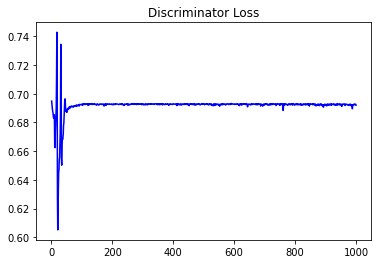

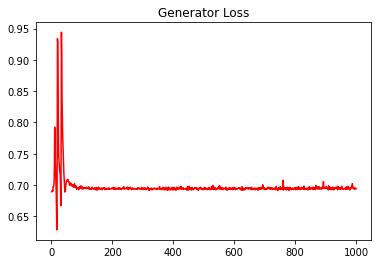

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008464506695121719


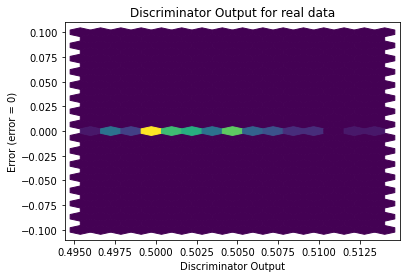

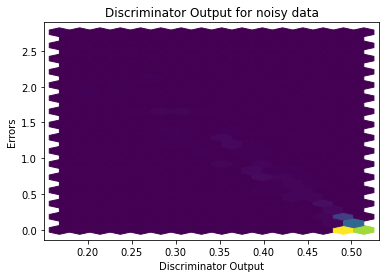

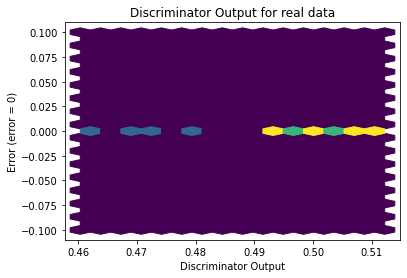

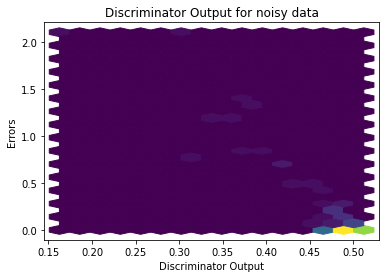

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


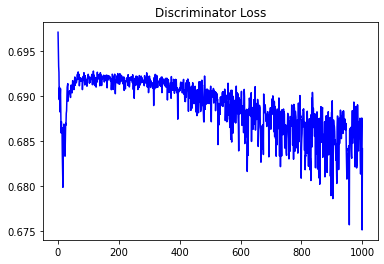

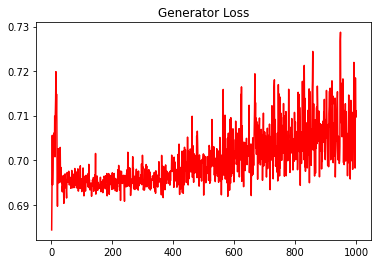

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007207908573149024


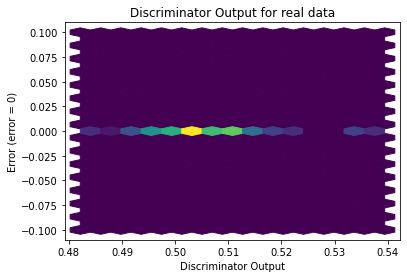

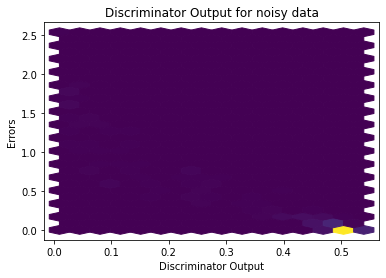

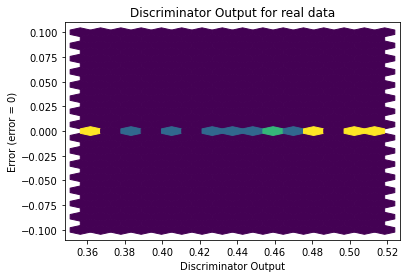

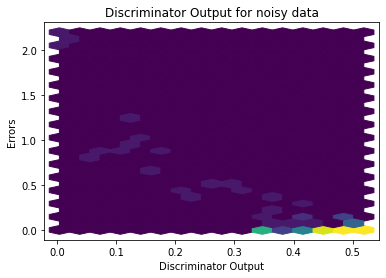

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1117]], requires_grad=True)
